<h1><center>Homework 4. Due: Monday, Nov. 13, 6pm</center></h1>
<h1><center>ywang28</center></h1>

# Problem 1.
## (a) (10 points) Implement your own k-means algorithm from the lecture slides using Python
Firstly, we need to import numpy.

In [1]:
import numpy as np

The implymented k-means algorithm is

In [113]:
class KMeans:
    def __init__(self, n_clusters, max_iter=100):
        self.m = n_clusters
        self.max_iter = max_iter

    def init_centroids(self):
        data_min, data_max = np.min(self.data, axis=0), np.max(self.data, axis=0)
        self.centroids = np.random.random((self.m, self.l)) * \
                            (data_max - data_min) + data_min

    def assignment(self):
        for i in range(self.n):
            self.labels_[i] = np.argmin(np.sqrt(
                np.sum((self.data[i, :] - self.centroids)**2, axis=1)))

    def update(self):
        for i in range(self.m):
            if True in (self.labels_ == i):
                self.centroids[i] = np.mean(self.data[self.labels_ == i, :], axis=0)


    def fit(self, X):
        self.data = X
        self.l = np.shape(self.data)[1]
        self.n = np.shape(self.data)[0]
        self.init_centroids()
        self.labels_ = np.random.randint(self.m, size=self.n)
        cnt = 1
        while True:
            pre_centroids = self.centroids.copy()
            self.assignment()
            self.update()
            # End condition judgement
            if np.sum(np.abs(pre_centroids - self.centroids)) == 0:
                print('After {} iterations k means converges.'.format(cnt))
                break
            if cnt > self.max_iter:
                print('Reach max iteration number..')
                break
            cnt += 1

## (b) (10 points) Using the k-means algorithm, cluster the data from the attached file realdata.txt. Plot X,Y coordinates for the entire dataset. Use different symbols and colors to represent your data points for different clusters. Label X and Y axis as 'Length' and 'Width', correspondingly. Label each cluster as “Cluster 1”, “Cluster 2”, etc. Explain your findings.
Firstly, we need to import dependencies. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from k_means import KMeans

Next, we will create an instance of KMeans class, fit our data and visualize the clustering result. In this time, we will set the cluster number to 2.

After 3 iterations k means converges.


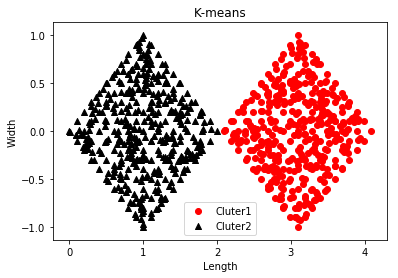

In [4]:
k_means = KMeans(2)
X = np.loadtxt("realdata.txt")[:, 1:]
k_means.fit(X)
labels = k_means.labels_

plt.xlabel('Length')
plt.ylabel('Width')
handles = []
s1 = plt.scatter(X[labels == 0, 0], X[labels == 0, 1],
                 color='r', label="Cluter1", marker='o')
handles.append(s1)
s2 = plt.scatter(X[labels == 1, 0], X[labels == 1, 1],
                 color='k', label="Cluter2", marker='^')
handles.append(s2)

plt.legend(handles=handles)
plt.title('K-means')
plt.show()

Due to my experiments, when m is 2 the k-means algorithm converges and meets the ending condition that the centroids don’t change any more after 4 iterations. And I have tried different random initializations, they all converge to the same result.

Now, I will try to change the cluster number to a wrong value, let's say 3.

After 11 iterations k means converges.


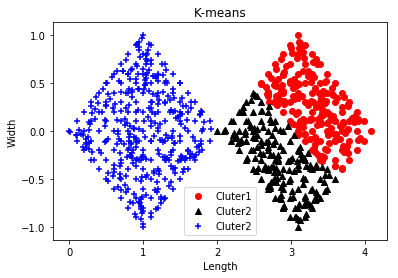

In [5]:
k_means = KMeans(3)
X = np.loadtxt("realdata.txt")[:, 1:]
k_means.fit(X)
labels = k_means.labels_

plt.xlabel('Length')
plt.ylabel('Width')
handles = []
s1 = plt.scatter(X[labels == 0, 0], X[labels == 0, 1],
                 color='r', label="Cluter1", marker='o')
handles.append(s1)
s2 = plt.scatter(X[labels == 1, 0], X[labels == 1, 1],
                 color='k', label="Cluter2", marker='^')
handles.append(s2)
s3 = plt.scatter(X[labels == 2, 0], X[labels == 2, 1],
                 color='b', label="Cluter2", marker='+')
handles.append(s3)

plt.legend(handles=handles)
plt.title('K-means')
plt.show()

We can see although k-means can converge after a couple of iterations, the result is wrong.
We can conclude:

1.	When the clusters have similar sizes, little noise and significant differences of distances from each other, k-means can cluster very accurately to the same result.
2.	Number of clusters is required for k-means, or the result will be wrong.


# Problem 2.

## (a) (10 points) Implement your own logistic regression with regularization algorithm from the lecture slides using Python

In [84]:
import  numpy as np


class LogisticRegression():
    def __init__(self, learning_rate, max_iter, lamb):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.lamb = lamb

    def sigmoid(self, z):
        # to remove overflow problem
        z[-z > 500] = -500
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape[0], X.shape[1] + 1
        one = np.ones((self.m, 1))
        self.w = np.random.normal(loc=0.0, scale=0.1, size=(self.n, 1))
        self.X = np.concatenate((one, X), axis=1)
        self.y = y.reshape((self.m, 1))
        for i in range(self.max_iter):
            z = self.X.dot(self.w)
            sig = self.sigmoid(z)
            d_sig_z = sig * (1 - sig)
            d_j_sig = -self.y / (sig + 0.0001) + (1 - self.y) / (1 - sig + 0.0001)
            d_z_w = self.X
            gradient = np.sum(d_j_sig * d_sig_z * d_z_w, axis=0) / self.m
            gradient = gradient.reshape((self.n, 1))
            gradient += self.lamb / self.m * self.w
            self.w -= self.learning_rate * gradient

    def predict(self, X):
        one = np.ones((X.shape[0], 1))
        one_X = np.concatenate((one, X), axis=1)
        pred = np.ravel(self.sigmoid(one_X.dot(self.w))) > 0.5
        pred = pred * 1.0
        return pred

## (b) (10 points) Using the implemented algorithm, train and test the data from the attached file realdata1.zip:


### Use 80% of each class data to train your classifier, and the remaining 20% to test it.


### Run different values of logistic regression regularization parameter (λ). The range of λ is from -2 to 4 and the step is 0.2


### Plot the f-measure of the algorithm’s performance on the training set as a function of (λ):

$f -measure = 2 * Pr * Re / (Pr + Re)$

where $Pre = TP / (TP + FP); Rec = TP / (TP + FN)$

and TP is the number of true positives (class 1 members predicted as class 1),
TN is the number of true negatives (class 2 members predicted as class 2),
FP is the number of false positives (class 2 members predicted as class 1),
and FN is the number of false negatives (class 1 members predicted as class 2).

Firstly, we need to write a function to load the data.

In [131]:
import numpy as np
from collections import OrderedDict


data = []
with open('realdata1\chronic_kidney_disease_full.arff', 'rb') as f:
    lines = [x.strip() for x in f.readlines()]
    data_start = False
    for line in lines:
        if data_start:
            if line == b'':
                break
            data.append(
              line.decode('utf-8').replace('\t', '').replace(' ', '').split(','))
        if line == b'@data':
            data_start = True

After loading the data, I found there are lots of problems with the original data so that it can be used directly. For example, there are lots of missing features. I complete the missing feature with the mean value of all the same variables of corresponding features. Also, some of the features are categorical which can not be used with logistic classification. Here, I change the catergorical feature into one-hot form.

In [86]:
numerical_features = [0, 1, 2, 9, 10, 11, 12, 13, 14, 15, 16, 17]


def get_raw_data(data, num_features):
    X = []
    y = []
    i = 0
    ct = OrderedDict({'age': [], 'bp': [], 'sg': [],
                            'al': [], 'su': [], 'rbc': [],
                            'pc': [], 'pcc': [], 'ba': [],
                            'bgr': [], 'bu': [], 'sc': [],
                            'sod': [], 'pot': [], 'hemo': [],
                            'pcv': [], 'wc': [], 'rc': [],
                            'htn': [], 'dm': [], 'cad': [],
                            'appet': [], 'pe': [], 'ane': []})
    for sample in data:
        j = 0
        sample_bias = 0
        sample_raw = []
        for c in ct:
            if j not in num_features:
                # fix wrong format
                while sample[j + sample_bias] is '':
                    sample_bias += 1
                if sample[j + sample_bias] not in ct[c] and sample[j + sample_bias] is not '?':
                    ct[c].append(sample[j + sample_bias])
                    sample_raw.append(sample[j + sample_bias])
                else:
                    sample_raw.append(sample[j + sample_bias])
            else:
                sample_raw.append(sample[j + sample_bias])
            j += 1
        X.append(sample_raw)
        y.append(sample[j + sample_bias])
        i += 1
    return X, y, ct


def complete_missing_data(X_raw, ct, num_features):
    # get the lens of category and initialize the means of every feature
    lens = OrderedDict({})
    means = OrderedDict({})
    num = OrderedDict({})

    for c in ct:
        # numerical
        if len(ct[c]) is 0:
            lens[c] = 1
            means[c] = 0
        # binary
        elif len(ct[c]) is 2:
            lens[c] = 1
            means[c] = 0
        # multi-class
        else:
            lens[c] = len(ct[c])
            means[c] = np.zeros(len(ct[c]))
        num[c] = 0
    i = 0
    for x in X_raw:
        j = 0
        for c in ct:
            # numerical feature
            if x[j] != '?':
                num[c] += 1
                if j in num_features:
                    means[c] += np.float32(x[j])
                    X_raw[i][j] = np.float32(x[j])
                # binary feature
                elif len(ct[c]) == 2:
                    X_raw[i][j] = ct[c].index(x[j])
                    means[c] += X_raw[i][j]
                # multi-class feature
                else:
                    tmp = np.zeros(lens[c])
                    tmp[ct[c].index(x[j])] = 1
                    means[c] += tmp
                    X_raw[i][j] = tmp
            j += 1
        i += 1
    for c in ct:
        means[c] /= num[c]

    # complete missing feature
    for i in range(len(X_raw)):
        j = 0
        for c in ct:
            if X_raw[i][j] is '?':
                X_raw[i][j] = means[c]
            j += 1
    # change into numpy array
    X_new = np.array([[]])
    for x in X_raw:
        x_new = np.array([])
        for j in range(24):
            if np.shape(x[j]) == ():
                x_new = np.concatenate((x_new, np.array([x[j]])), axis=0)
            else:
                x_new = np.concatenate((x_new, x[j]), axis=0)
        x_new = x_new.reshape((1, -1))
        if X_new.shape == (1, 0):
            X_new = x_new
        else:
            X_new = np.concatenate((X_new, x_new), axis=0)

    return X_new

Now I put all these preprocessing staffs together using one function.

In [87]:
def get_data():
    X_raw, y_raw, category = get_raw_data(data, numerical_features)
    X = complete_missing_data(X_raw, category, numerical_features)
    #X = normalize_data(X)

    y = np.array(y_raw) == 'notckd'
    y = y.astype(np.float32)
    return X, y

I write a function to shuffle the data into training set and testing set as specific proportion.

In [88]:
def split_into_train_test_set(X, y, per_train):
    n_train = np.int(y.shape[0] * per_train)
    p = np.random.permutation(y.shape[0])

    return X[p][:n_train], y[p][:n_train], X[p][n_train:], y[p][n_train:]

With this function, we now can train the data and see the result.

C:\Users\wangy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


lambda: -2.0, f-measure: 0.0, precision: 0.621875
lambda: -1.8, f-measure: 0.0, precision: 0.621875
lambda: -1.6, f-measure: 0.5487528344671202, precision: 0.378125
lambda: -1.4, f-measure: 0.0, precision: 0.621875
lambda: -1.2, f-measure: 0.5487528344671202, precision: 0.378125
lambda: -1.0, f-measure: 0.5487528344671202, precision: 0.378125
lambda: -0.7999999999999998, f-measure: 0.5487528344671202, precision: 0.378125
lambda: -0.5999999999999999, f-measure: 0.0, precision: 0.621875
lambda: -0.3999999999999999, f-measure: 0.5487528344671202, precision: 0.378125
lambda: -0.19999999999999996, f-measure: 0.5487528344671202, precision: 0.378125
lambda: 0.0, f-measure: 0.0, precision: 0.621875
lambda: 0.20000000000000018, f-measure: 0.0, precision: 0.621875
lambda: 0.40000000000000036, f-measure: 0.0, precision: 0.621875
lambda: 0.6000000000000001, f-measure: 0.0, precision: 0.621875
lambda: 0.8000000000000003, f-measure: 0.0, precision: 0.621875
lambda: 1.0, f-measure: 0.0, precision: 0.

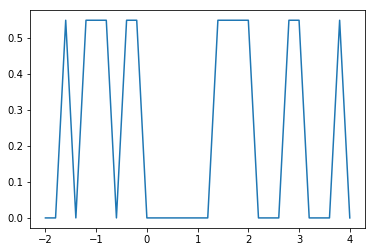

In [98]:
from sklearn.metrics import f1_score


X, y = get_data()
X_train, y_train, X_test, y_test = split_into_train_test_set(X, y, 0.8)
lam = np.linspace(-2, 4, 31)
f1 = lam.copy()
for i in range(31):
    clf = LogisticRegression(0.02, 5000, lam[i])
    clf.fit(X_train, y_train)
    pred = clf.predict(X_train)
    f = f1_score(y_train, pred)
    f1[i] = f
    print('lambda: {}, f-measure: {}, precision: {}'.format(lam[i], f, np.mean(y_train == pred)))
plt.plot(lam, f1)
plt.show()

We can see with the original data, the fitting performance is very bad and even sometimes fails.

## (c) (10 points) Repeat the procedure in (b) but now using the features normalized with the standardization protocol discussed in the class

In [99]:
def normalize_data(X):
    X -= np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X /= std
    return X

In [100]:
def get_normalized_data():
    X_raw, y_raw, category = get_raw_data(data, numerical_features)
    X = complete_missing_data(X_raw, category, numerical_features)
    X = normalize_data(X)

    y = np.array(y_raw) == 'notckd'
    y = y.astype(np.float32)
    return X, y

lambda: -2.0, f-measure: 1.0
lambda: -1.8, f-measure: 1.0
lambda: -1.6, f-measure: 1.0
lambda: -1.4, f-measure: 1.0
lambda: -1.2, f-measure: 1.0
lambda: -1.0, f-measure: 1.0
lambda: -0.7999999999999998, f-measure: 1.0
lambda: -0.5999999999999999, f-measure: 1.0
lambda: -0.3999999999999999, f-measure: 1.0
lambda: -0.19999999999999996, f-measure: 1.0
lambda: 0.0, f-measure: 1.0
lambda: 0.20000000000000018, f-measure: 1.0
lambda: 0.40000000000000036, f-measure: 1.0
lambda: 0.6000000000000001, f-measure: 1.0
lambda: 0.8000000000000003, f-measure: 1.0
lambda: 1.0, f-measure: 1.0
lambda: 1.2000000000000002, f-measure: 0.9959183673469388
lambda: 1.4000000000000004, f-measure: 0.9959183673469388
lambda: 1.6, f-measure: 0.9959183673469388
lambda: 1.8000000000000003, f-measure: 0.9959183673469388
lambda: 2.0, f-measure: 0.9959183673469388
lambda: 2.2, f-measure: 0.9959183673469388
lambda: 2.4000000000000004, f-measure: 0.9959183673469388
lambda: 2.6000000000000005, f-measure: 0.991869918699187
l

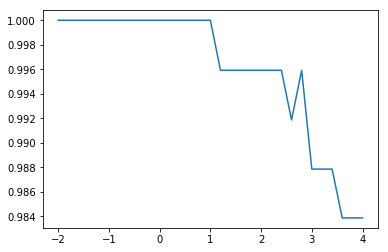

In [101]:
X, y = get_normalized_data()
X_train, y_train, X_test, y_test = split_into_train_test_set(X, y, 0.8)
lam = np.linspace(-2, 4, 31)
f1 = lam.copy()
np.random.seed(0)
for i in range(31):
    clf = LogisticRegression(learning_rate=0.02, max_iter=5000, lamb=lam[i])
    clf.fit(X_train, y_train)
    pred = clf.predict(X_train)
    f = f1_score(y_train, pred)
    f1[i] = f
    print('lambda: {}, f-measure: {}'.format(lam[i], f))
plt.plot(lam, f1)
plt.show()

With normalizition, the performance of the learning increases significantly. We can find when the $\lambda$ is close to 0, the training performance is best. And the performance of trainning based on f-measure decreases as $\lambda$ becomes larger.

This part of the homework, you will be working on applying methods and datasets from Scikit-learn library.

# Problem 3. (20 points) Apply three clustering techniques to the handwritten digits dataset. Assume with k=10:

Firstly, we need to import dependencies and the data set.

In [114]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster.supervised \
    import check_clusterings, contingency_matrix

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

Next, I define a function to define the cluster by the digit that represents the majority of the current cluster as the instructions.

In [115]:
# Redefine cluster's name
def def_cluster(y, labels):
    labels_new = labels.copy()
    for i in range(10):
        counts = np.bincount(y[labels == i])
        if counts.shape[0] > 0:
            labels_new[labels == i] = np.argmax(counts)
    return labels_new

I have to re-inpelement the function 'fowlkes_mallows_score' to calculate Fowlkes and Mallows index, since there will be an overflow problem with the function from scikit.

In [116]:
def fowlkes_mallows_score(labels_true, labels_pred, sparse=False):
    labels_true, labels_pred = check_clusterings(labels_true, labels_pred)
    n_samples, = labels_true.shape

    c = contingency_matrix(labels_true, labels_pred, sparse=True)
    tk = np.dot(c.data, c.data) - n_samples
    pk = np.sum(np.asarray(c.sum(axis=0)).ravel() ** 2) - n_samples
    qk = np.sum(np.asarray(c.sum(axis=1)).ravel() ** 2) - n_samples
    return tk / np.sqrt(np.float32(pk) * qk) if tk != 0. else 0.

## k-means clustering implemented above
### Fit the data and rename the clusters.

In [117]:
clustering = KMeans(n_clusters=10, max_iter=500)
clustering.fit(X)
labels = def_cluster(y, clustering.labels_)
print('Print 30 samples to see the performance of the algorithm intuitively.')
print('y:      ' + str(y[:30]))
print('cluster:' + str(labels[:30]))

After 22 iterations k means converges.
Print 30 samples to see the performance of the algorithm intuitively.
y:      [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
cluster:[0 1 1 3 4 3 6 7 8 3 0 1 2 3 4 7 6 7 1 3 0 1 2 3 4 7 6 1 1 3]


### Create confusion matrix.

In [118]:
cfs_mat = confusion_matrix(y, labels)
print("confusion matrix:")
print(cfs_mat)

confusion matrix:
[[176   0   0   0   2   0   0   0   0   0]
 [  0 155  25   0   0   0   2   0   0   0]
 [  1   6 144   1   0   0   0   1  24   0]
 [  0   3   1 145   0   0   0  12  22   0]
 [  0   8   0   0 163   0   0  10   0   0]
 [  0   4   0  84   3   0   3  87   1   0]
 [  1   3   0   0   0   0 177   0   0   0]
 [  0  10   0   0   0   0   0 169   0   0]
 [  0  77   3   6   0   0   1  12  75   0]
 [  0  20   0 107   0   0   0  14  39   0]]


From the confusion matrix, we can see for most digits the clustering results are relatively good. But for number 5 and number 9, the results are very bad.

### Fowlkes–Mallows index

In [119]:
fm_index = fowlkes_mallows_score(y, labels)
print("Fowlkes–Mallows index:")
print(fm_index)

Fowlkes–Mallows index:
0.594720942252


The Fowlkes–Mallows index is 0.594720942252, much lower than 1. So we can conclude the clustering result is not very good.

## Agglomerative clustering with Ward linkage
### Fit the data and rename the clusters.

In [120]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=10)
clustering.fit(X)
labels = def_cluster(y, clustering.labels_)
print('Print 30 samples to see the performance of the algorithm intuitively.')
print('y:      ' + str(y[:30]))
print('cluster:' + str(labels[:30]))

Print 30 samples to see the performance of the algorithm intuitively.
y:      [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
cluster:[0 1 8 3 4 3 6 7 8 3 0 1 2 3 4 5 6 7 8 3 0 1 2 3 4 5 6 7 8 3]


### Create confusion matrix.

In [121]:
cfs_mat = confusion_matrix(y, labels)
print("confusion matrix:")
print(cfs_mat)

confusion matrix:
[[178   0   0   0   0   0   0   0   0   0]
 [  0 155  27   0   0   0   0   0   0   0]
 [  0   0 166   0   0   0   0   1  10   0]
 [  0   0   0 169   0   0   0   1  13   0]
 [  0   0   0   0 178   0   0   3   0   0]
 [  0   0   0   2   0 179   1   0   0   0]
 [  0   0   0   0   0   0 180   0   1   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   3   4   1   0   0   0   1 165   0]
 [  0  20   0 145   0   2   0  11   2   0]]


From the confusion matrix, we can see for most digits the clustering results are very good. But for the numbers 9, the results are very bad. Numbers 3 and 9 have been clustered into the same cluster.

### Fowlkes–Mallows index

In [122]:
fm_index = fowlkes_mallows_score(y, labels)
print("Fowlkes–Mallows index:")
print(fm_index)

Fowlkes–Mallows index:
0.832139504671


The Fowlkes–Mallows index is 0.832139504671, very close to 1. So we can conclude the clustering result is very good.

## AffinityPropagation
### Fit the data and rename the clusters.

In [123]:
af = AffinityPropagation(preference=-80000).fit(X)
labels = def_cluster(y, clustering.labels_)
print('Print 30 samples to see the performance of the algorithm intuitively.')
print('y:      ' + str(y[:30]))
print('cluster:' + str(labels[:30]))

Print 30 samples to see the performance of the algorithm intuitively.
y:      [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
cluster:[0 1 8 3 4 3 6 7 8 3 0 1 2 3 4 5 6 7 8 3 0 1 2 3 4 5 6 7 8 3]


### Create confusion matrix.

In [124]:
cfs_mat = confusion_matrix(y, labels)
print("confusion matrix:")
print(cfs_mat)

confusion matrix:
[[178   0   0   0   0   0   0   0   0   0]
 [  0 155  27   0   0   0   0   0   0   0]
 [  0   0 166   0   0   0   0   1  10   0]
 [  0   0   0 169   0   0   0   1  13   0]
 [  0   0   0   0 178   0   0   3   0   0]
 [  0   0   0   2   0 179   1   0   0   0]
 [  0   0   0   0   0   0 180   0   1   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   3   4   1   0   0   0   1 165   0]
 [  0  20   0 145   0   2   0  11   2   0]]


From the confusion matrix, we can see for most digits the clustering results are very good. But for the numbers 9, the results are very bad. Numbers 3 and 9 have been clustered into the same cluster.

### Fowlkes–Mallows index

In [125]:
fm_index = fowlkes_mallows_score(y, labels)
print("Fowlkes–Mallows index:")
print(fm_index)

Fowlkes–Mallows index:
0.832139504671


The Fowlkes–Mallows index is 0.832139504671, very close to 1. So we can conclude the clustering result is very good.

# Problem 4. (20 points) Apply three classification techniques to the same realdata1.zip dataset as in Problem 2:

## Support Vector Machine with the linear kernel and default parameters

Firstly, we need to import dependencies and load the data.

In [127]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X, y = get_normalized_data()
X_train, y_train, X_test, y_test = split_into_train_test_set(X, y, 0.8)

Next, we begin to train SVM with linear kernel.

In [128]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
f = f1_score(y_test, pred)
print('f-measure: {}'.format(f))

f-measure: 0.9841269841269841


We can see the f-measure is very close to 1, which means the result is very good. The model we just trained can generalize nearly all the conditions that it didn't see before.

## Support Vector Machine with the RBF kernel and default parameters

In [129]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
f = f1_score(y_test, pred)
print('f-measure: {}'.format(f))

f-measure: 0.9841269841269841


The f-measure is very close to 1, which means the result is also very good. The model we just trained can generalize nearly all the conditions that it didn't see before.

## Random forest with default parameters

In [130]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
f = f1_score(y_test, pred)
print('f-measure: {}'.format(f))

f-measure: 1.0


The f-measure is  1, which means the result is perfect. The model we just trained can generalize all the conditions that it didn't see before.